In [1]:
from PIL import Image
import os, os.path
import numpy as np
import matplotlib.pyplot as plt
from ImageProcessing import ImageProcessor

In [12]:
imgs = []
imgs_cv_gauss = []
print(os.getcwd())
for dirs in os.listdir('./data'):
    imgs.append(np.asarray(Image.open(os.getcwd() + '/data/' + dirs)))

/home/nati/Desktop/Crochet/Crochet_Pattern_Generator_Web/server


1040 1040 dims


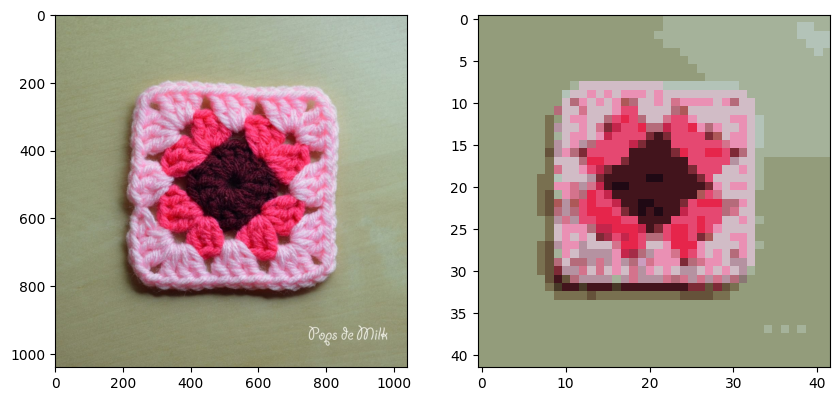

3000 3000 dims


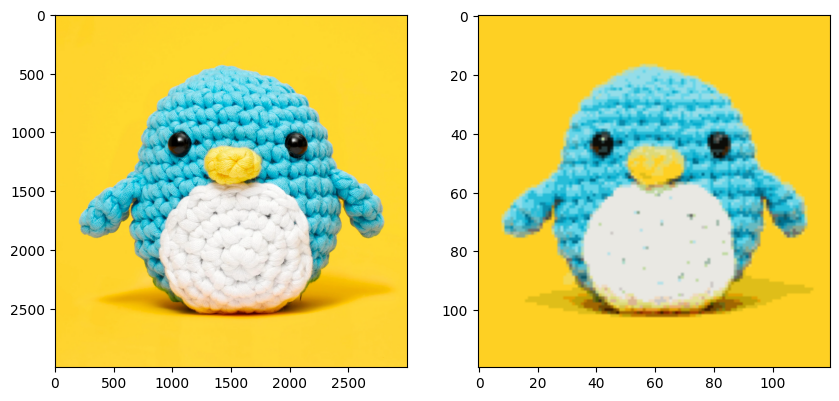

1060 1060 dims


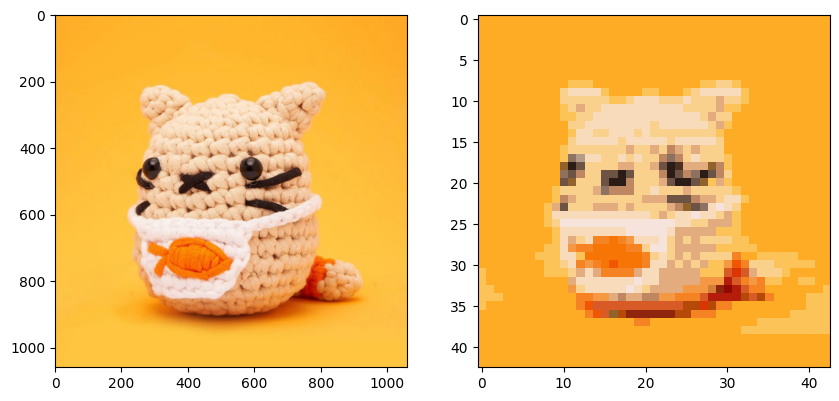

1242 839 dims


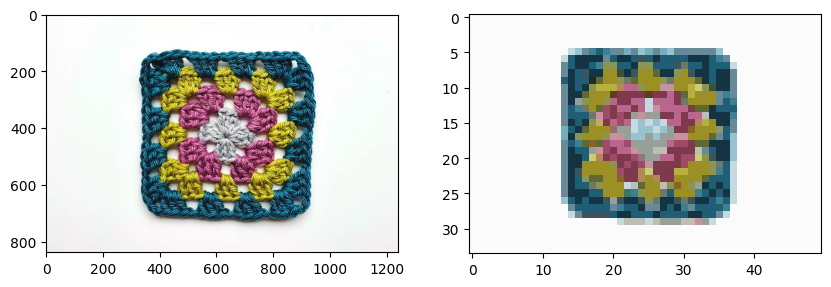

In [11]:
for img in imgs:
    imageProcesser = ImageProcessor(img, img.shape[1], img.shape[0], mode = 'np')
    fig, axs = plt.subplots(1, 2, figsize=(10, 8))

    axs[0].imshow(img)
    axs[1].imshow(imageProcesser.pixel_data)
    plt.show()
